# A gaussian integral

Using Monte Carlo integration, check that  
<center> $\int_{0}^{\infty} x^3 exp( -\frac{x^2}{2\sigma^2} ) dx = 2\sigma^4$ </center>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import halfnorm
from scipy.optimize import curve_fit

Does the result converge with the number of samples?

The numerical value of the integral is 1248.8667085867364
The given result of the integral is 1250


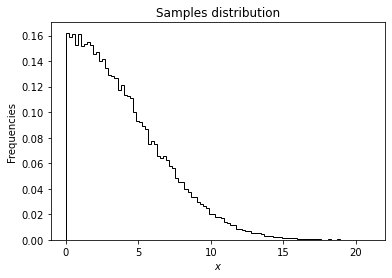

In [9]:
mu = 0
sigma = 5
N = 100000

xi = halfnorm.rvs(loc=0, scale=sigma, size=N)

def fun(x):
    return x**3 

integral = np.sqrt(np.pi / 2) * sigma * np.mean(fun(xi))  #normalized half-gaussian

print("The numerical value of the integral is", integral)
print("The given result of the integral is", 2*sigma**4)

plt.hist(xi, density = True, bins=100, color='black', histtype='step')
plt.title("Samples distribution")
plt.xlabel("$x$")
plt.ylabel("Frequencies")
plt.show()

How does the error go down?

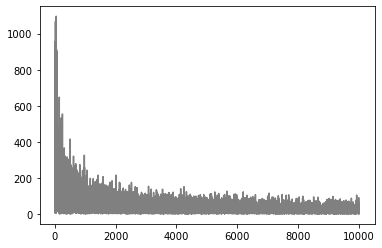

In [15]:
valori_N = np.linspace(10, 10000, num=10000, dtype=int)
results = []
errors = []

for N in valori_N:
    
    numeri_casuali = halfnorm.rvs(loc=0, scale=sigma, size=N)
    integral = np.sqrt(np.pi / 2) * sigma * np.mean(fun(numeri_casuali))
    error = abs(integral - 2*sigma**4)
    
    results.append(integral)
    errors.append(error)
    
plt.plot(valori_N, errors, color = 'grey')

Do it many times. For a given $N$, how are the result distributed? 

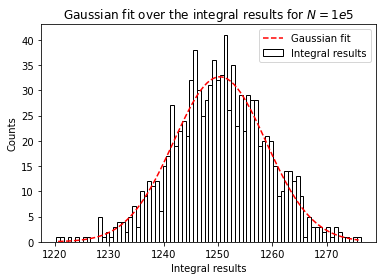

For a large N, the distribution seems to take a gaussian form


In [24]:
mu = 0
sigma = 5
N = 100000
reps = 1000

integrals = []

def fun(x):
    return x**3 

for _ in range(reps):
    xi = halfnorm.rvs(loc=0, scale=sigma, size=N)
    integral = np.sqrt(np.pi / 2) * sigma * np.mean(fun(xi))  #normalized half-gaussian
    
    integrals.append(integral)
    
# computation of the histogram values
counts, bin_edges = np.histogram(integrals, bins=80)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Gaussian fit
p0 = [np.mean(bin_centers), np.std(bin_centers), np.max(counts)] 
params, cov = curve_fit(gaussian, bin_centers, counts, p0=p0)

# histogram plot
plt.bar(bin_centers, counts, width=np.diff(bin_edges), 
        edgecolor = 'black', color= 'white', label='Integral results')

# fit plot
x_range = np.linspace(min(bin_centers), max(bin_centers), 100)
plt.plot(x_range, gaussian(x_range, *params), color='r', linestyle='dashed', label='Gaussian fit')

plt.title('Gaussian fit over the integral results for $N = 1e5$')
plt.legend()
plt.xlabel('Integral results')
plt.ylabel('Counts')

plt.show()

print("For a large N, the distribution seems to take a gaussian form")

And if $N$ is small?

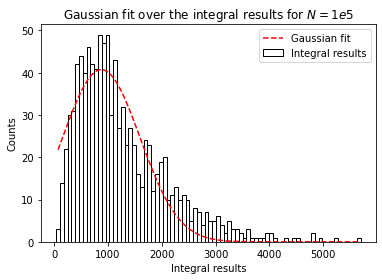

For a small N, the distribution seems to take a poissonian form


In [25]:
mu = 0
sigma = 5
N = 10
reps = 1000

integrals = []

def fun(x):
    return x**3 

for _ in range(reps):
    xi = halfnorm.rvs(loc=0, scale=sigma, size=N)
    integral = np.sqrt(np.pi / 2) * sigma * np.mean(fun(xi))  #normalized half-gaussian
    
    integrals.append(integral)
    
# computation of the histogram values
counts, bin_edges = np.histogram(integrals, bins=80)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Gaussian fit
p0 = [np.mean(bin_centers), np.std(bin_centers), np.max(counts)] 
params, cov = curve_fit(gaussian, bin_centers, counts, p0=p0)

# histogram plot
plt.bar(bin_centers, counts, width=np.diff(bin_edges), 
        edgecolor = 'black', color= 'white', label='Integral results')

# fit plot
x_range = np.linspace(min(bin_centers), max(bin_centers), 100)
plt.plot(x_range, gaussian(x_range, *params), color='r', linestyle='dashed', label='Gaussian fit')

plt.title('Gaussian fit over the integral results for $N = 1e5$')
plt.legend()
plt.xlabel('Integral results')
plt.ylabel('Counts')

plt.show()

print("For a small N, the distribution seems to take a poissonian form")